######Project Name : -
###Artificial Intelligence July Minor Project
######Project Description:
Make a Heart Disease Predictive Model to predict on the “target” column of the 
dataset
Steps to complete:
1. Specify Architecture
2. Compile the model
3. Fit the model
4. Predict on sample data


#Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#1.Specify Architecture

In [7]:
df.shape

(303, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


#Finding the correlation among the attributes

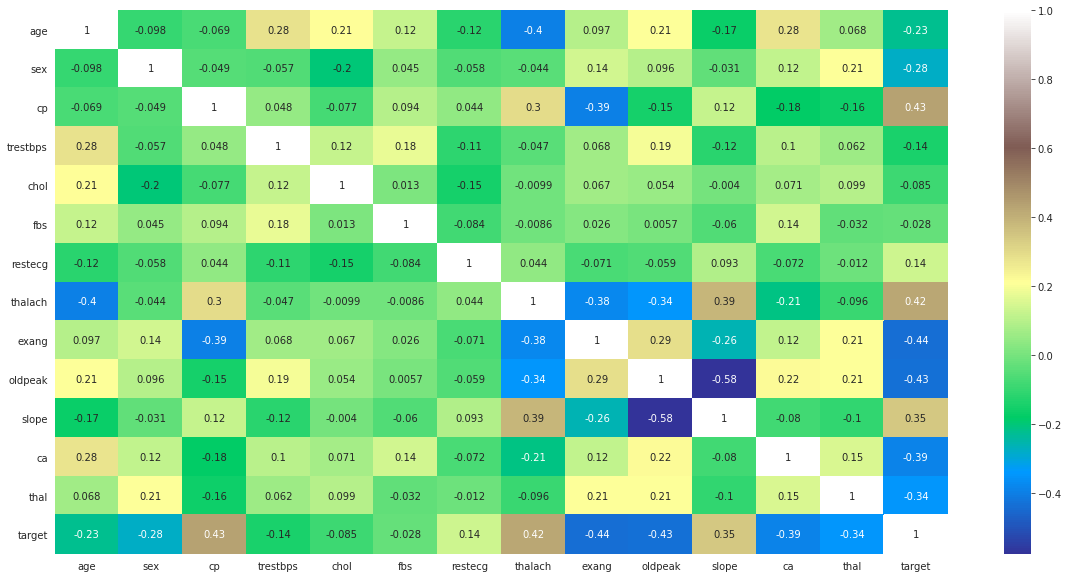

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

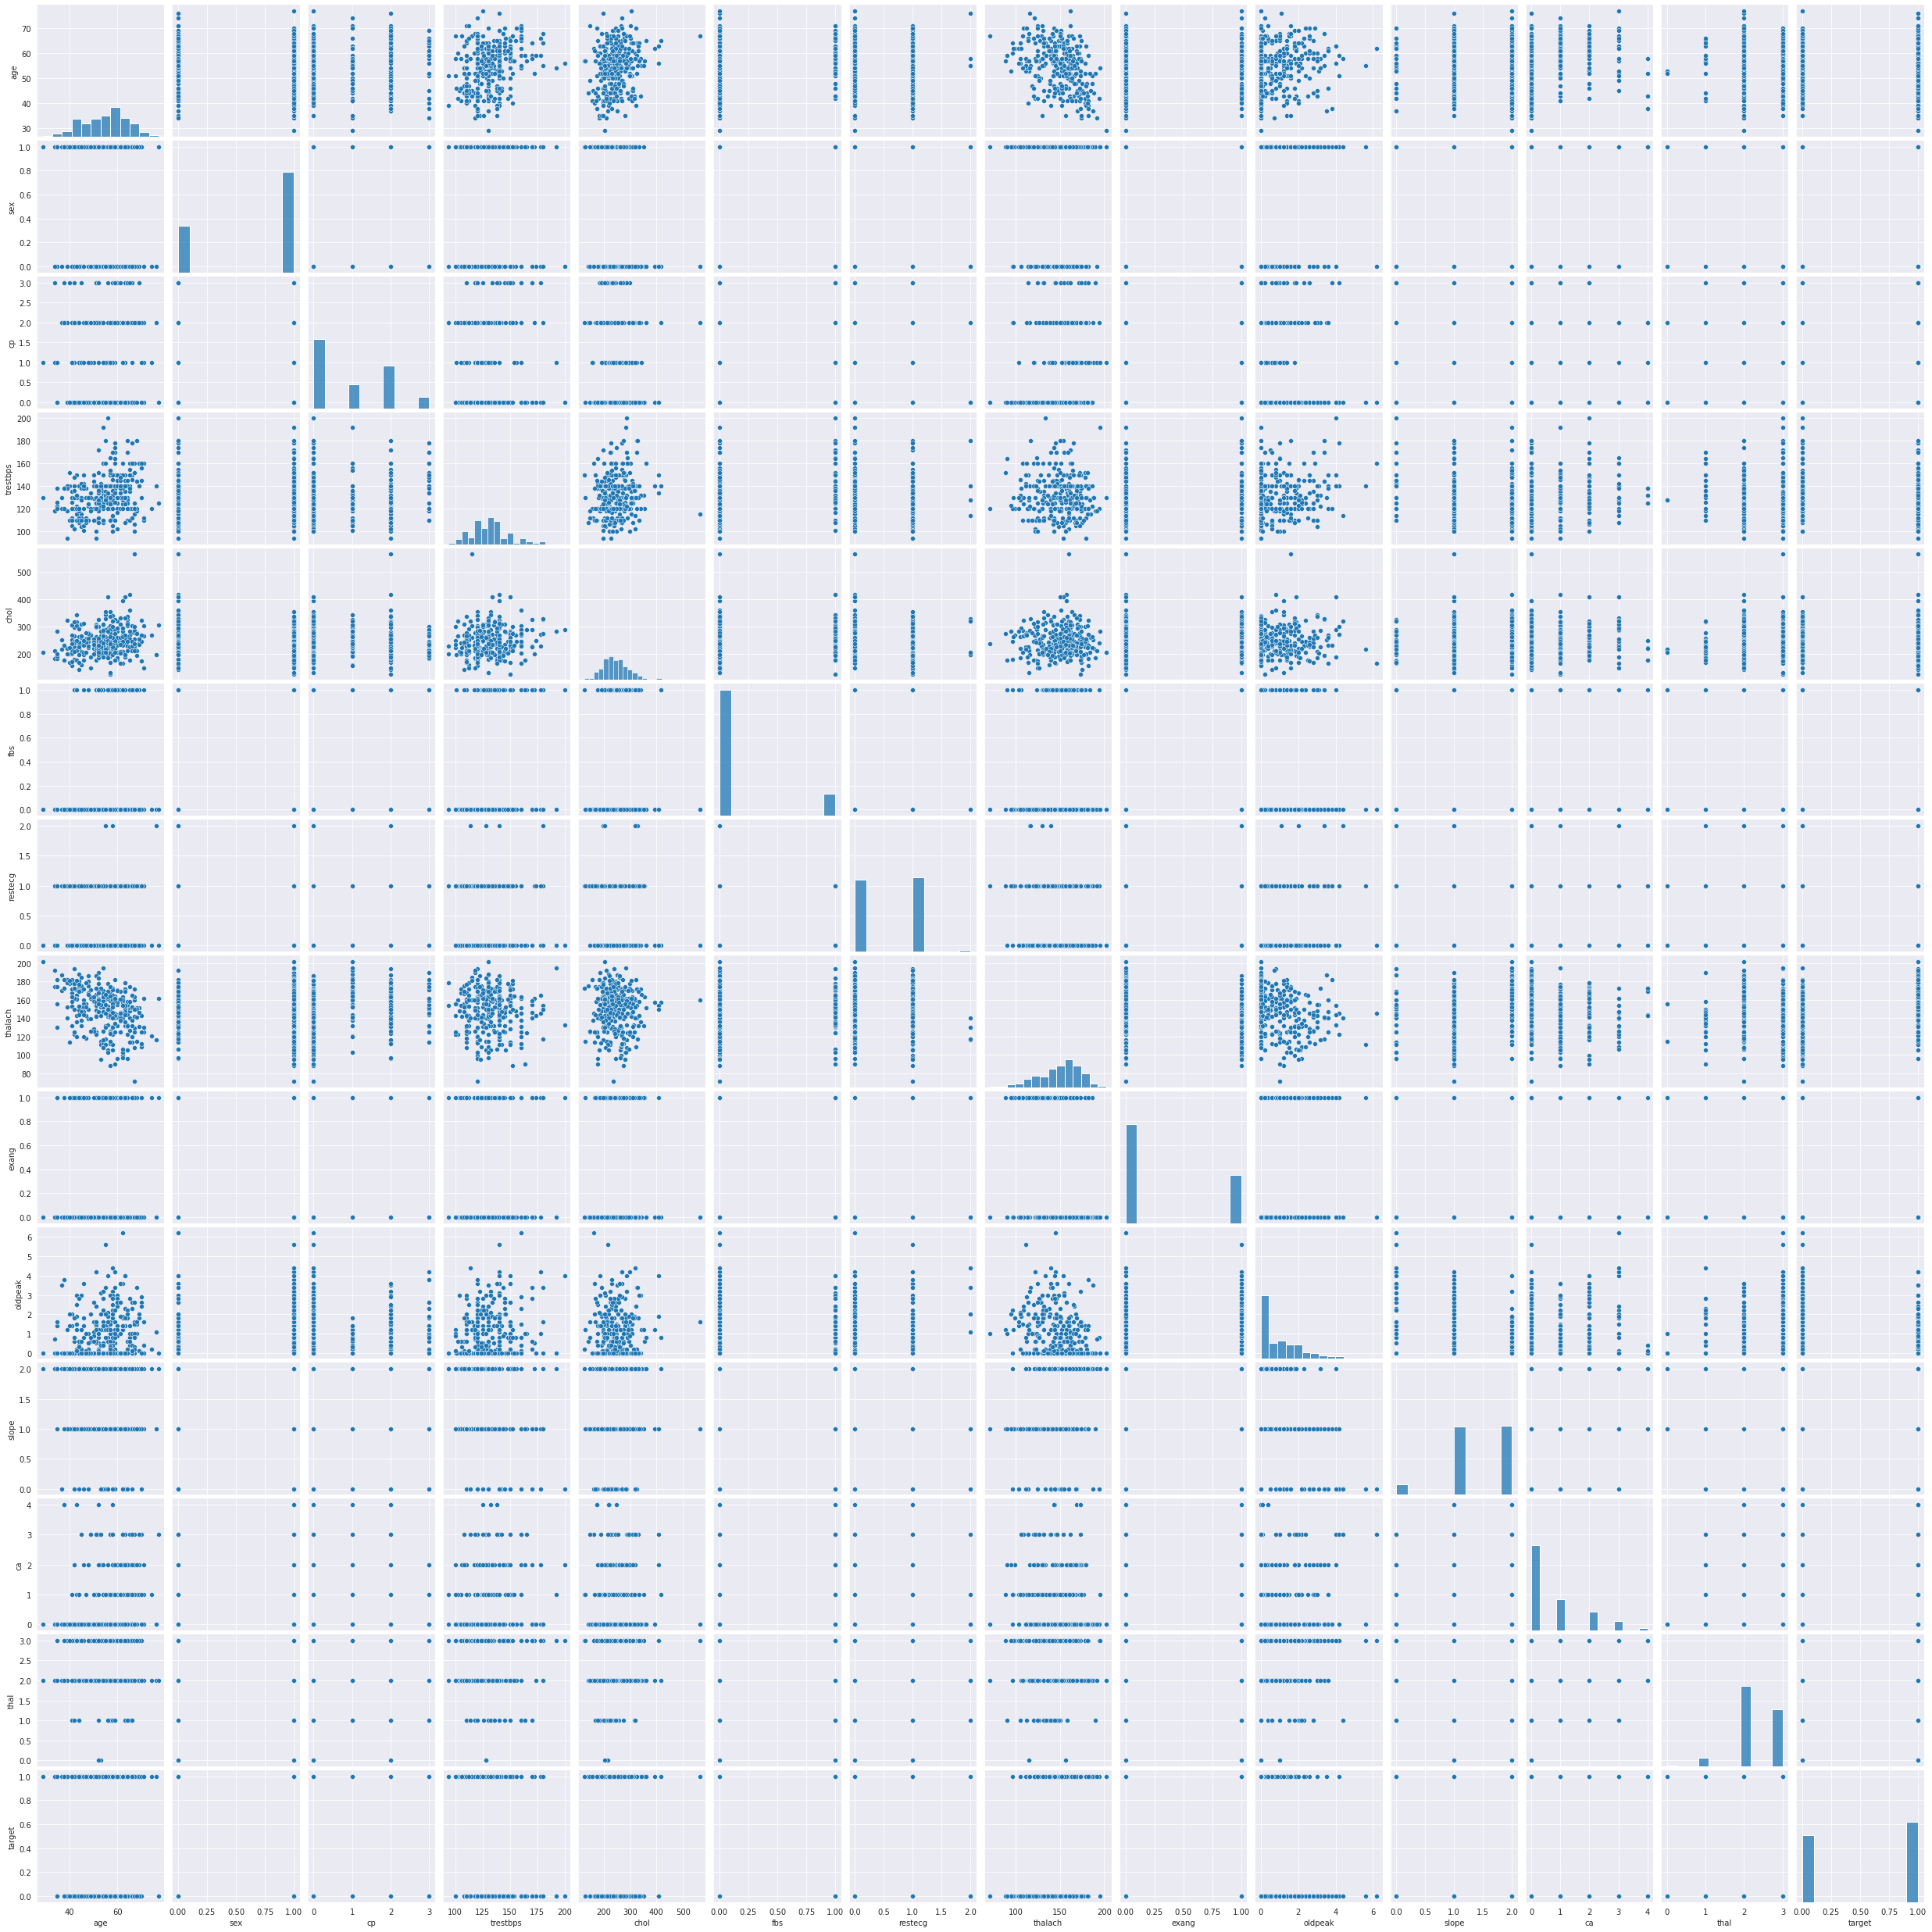

In [13]:
sns.pairplot(data=df)

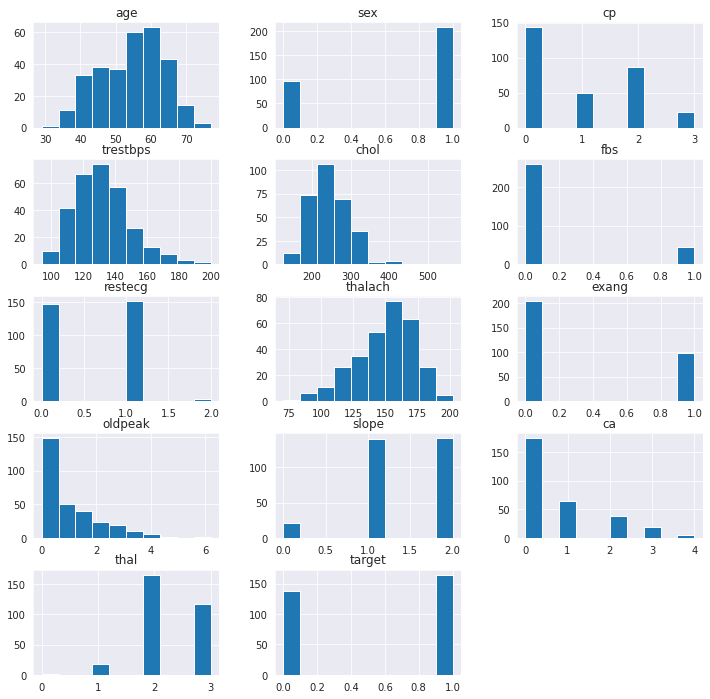

In [14]:
df.hist(figsize=(12,12), layout=(5,3));

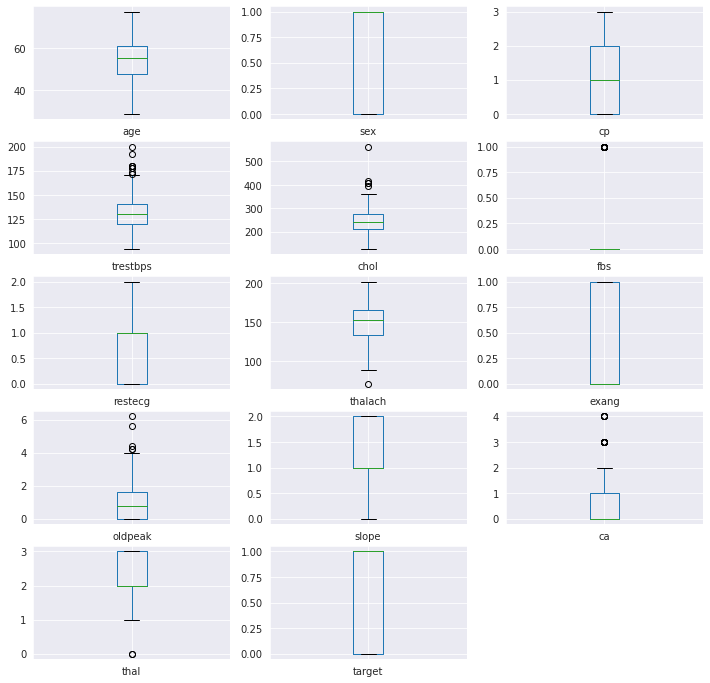

In [15]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

In [16]:
numeric_features = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']
eda_df = df.loc[:, numeric_features].copy()

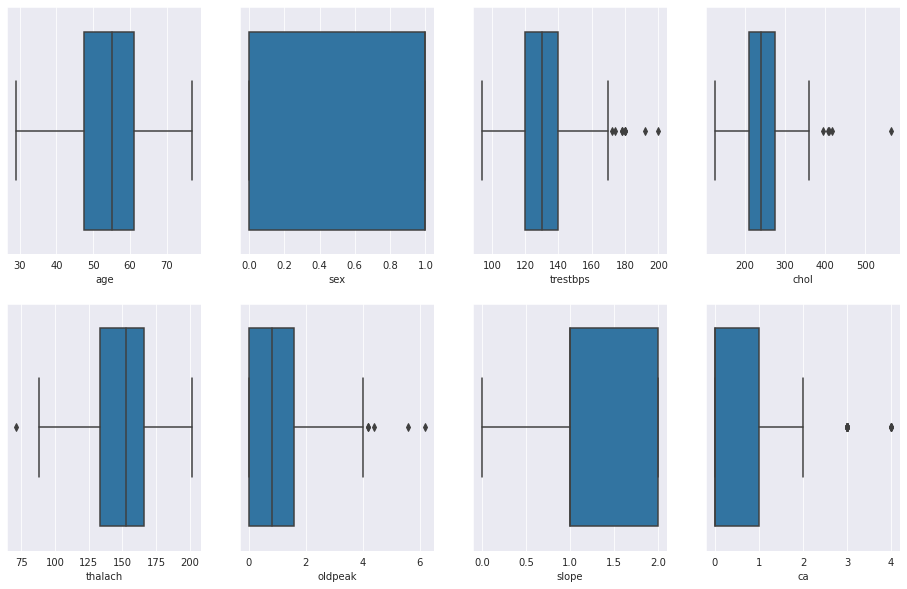

In [17]:
plt.figure(figsize=(16, 10))
for i in range(len(eda_df.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

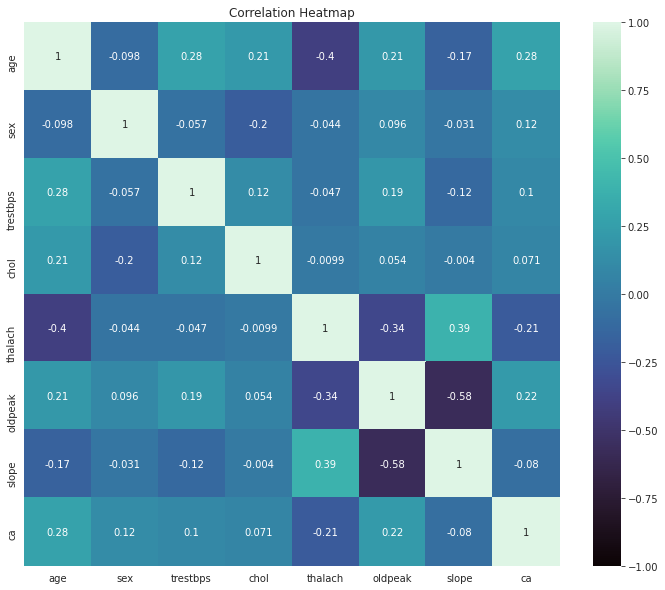

In [18]:
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

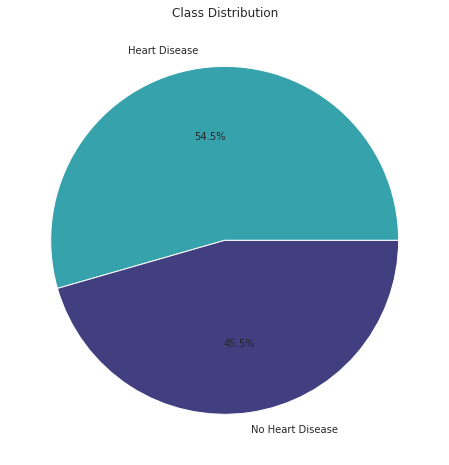

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(df['target'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

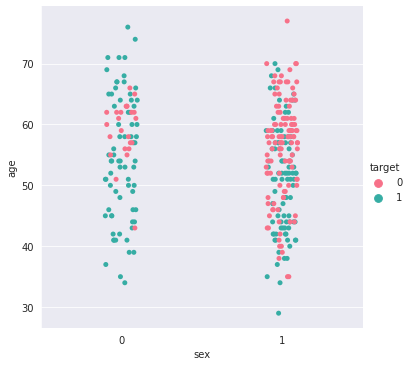

In [20]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

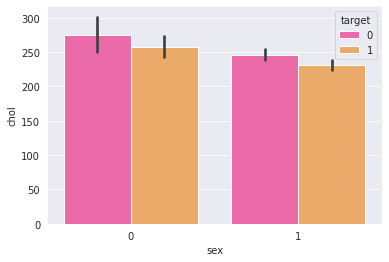

In [21]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [22]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

207 males and 96 females

In [23]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

###results of thallium stress test measuring blood flow to the heart,
with possible values normal, fixed_defect, reversible_defect


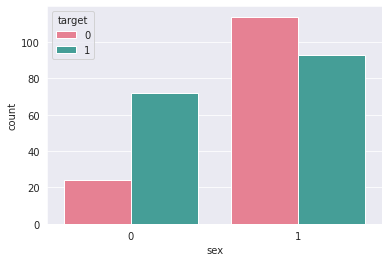

In [24]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')


Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

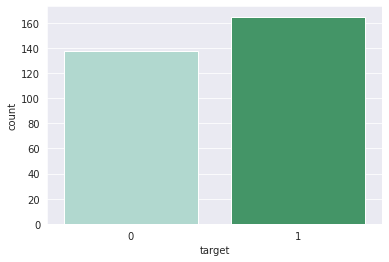

In [25]:
sns.countplot(x='target',palette='BuGn', data=df)


we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 140 and those having heart disease the count is 160.

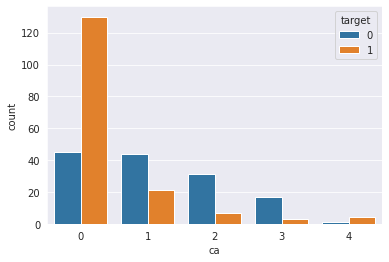

In [26]:
sns.countplot(x='ca',hue='target',data=df)

In [27]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

ca : number of major vessels (0-3) colored by flourosopy

In [28]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

ca number of major vessels (0-3) colored by flourosopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.

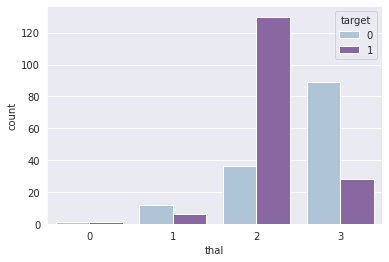

In [29]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

thal3 = normal; 6 = fixed defect; 7 = reversable defect

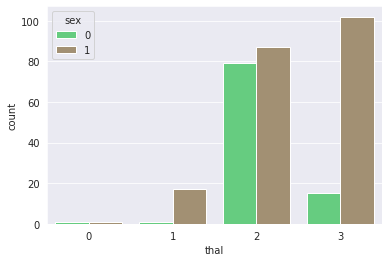

In [30]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [31]:
df['cp'].value_counts()  # chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

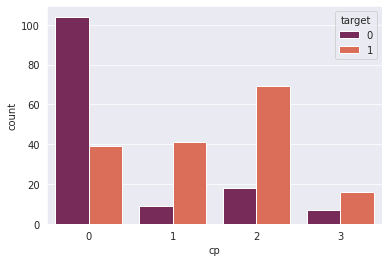

In [32]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

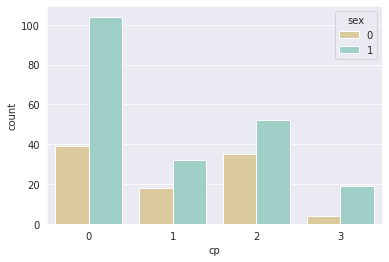

In [33]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

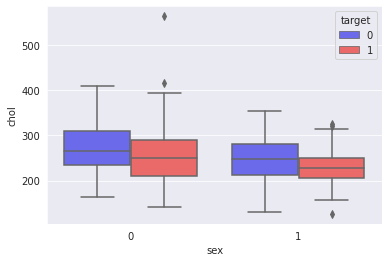

In [34]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

we observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set.

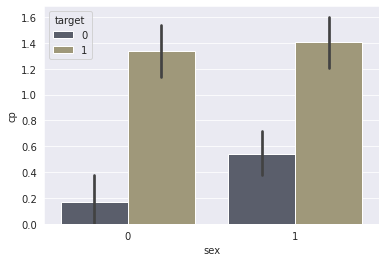

In [35]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

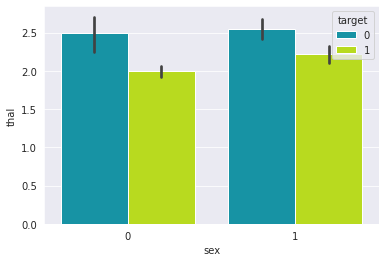

In [36]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

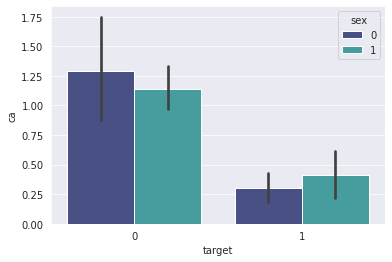

In [37]:

sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

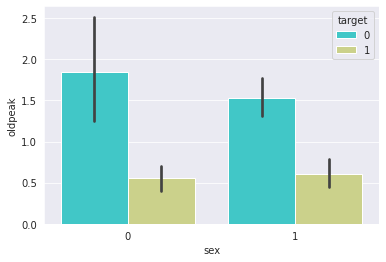

In [38]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

###fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

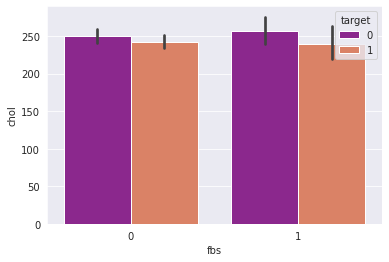

In [39]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

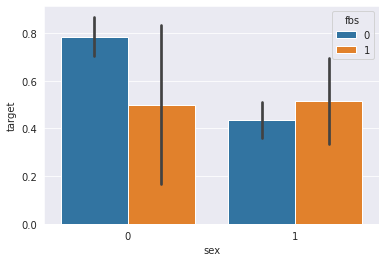

In [40]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

In [41]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


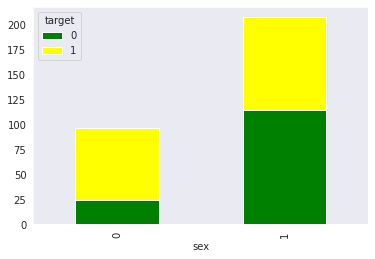

In [42]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [43]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


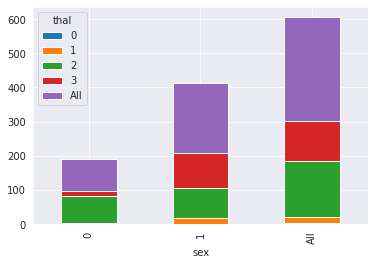

In [44]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [45]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,1,12,36,89,138
1,1,6,130,28,165
All,2,18,166,117,303


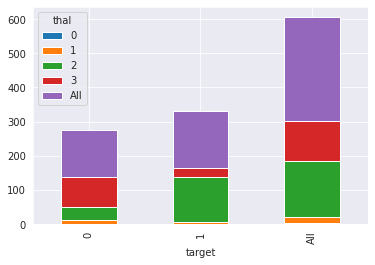

In [46]:

temp.plot(kind='bar', stacked=True)
plt.show()

In [47]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


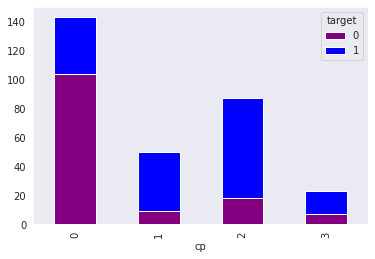

In [48]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [51]:
X= df.drop(['target'], axis=1)
y= df['target']

In [52]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [53]:

print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [55]:

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]])

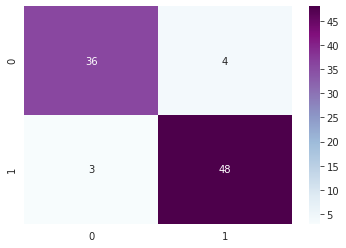

In [56]:

sns.heatmap(cm, annot=True,cmap='BuPu')

In [57]:

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


##Best accuracy is given by Logistic Regression : 92

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



In [60]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [61]:
cm2

array([[33,  7],
       [16, 35]])

In [62]:

accuracy_score(y_test,prediction2)

0.7472527472527473

In [63]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        40
           1       0.83      0.69      0.75        51

    accuracy                           0.75        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.75      0.75        91



In [64]:

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[34,  6],
       [ 7, 44]])

In [65]:
accuracy_score(y_test, prediction3)

0.8571428571428571

In [66]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.88      0.86      0.87        51

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [69]:
cm4

array([[33,  7],
       [ 2, 49]])

In [70]:

accuracy_score(y_test, prediction4)

0.9010989010989011

In [71]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)

In [72]:
cm5

array([[35,  5],
       [ 6, 45]])

In [73]:

accuracy_score(y_test, prediction5)

0.8791208791208791

In [74]:
print('cm4', cm4)
print('-----------')
print('cm5',cm5)

cm4 [[33  7]
 [ 2 49]]
-----------
cm5 [[35  5]
 [ 6 45]]


In [75]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[35,  5],
       [ 6, 45]])

In [76]:
print('KNN :', accuracy_score(y_test, prediction6))
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))

KNN : 0.8351648351648352
lr : 0.9230769230769231
dtc : 0.7472527472527473
rfc : 0.8571428571428571
NB:  0.9010989010989011
SVC : 0.8791208791208791


Best accuracy is given by Logistic Regression : 92
followed by NB and Decision tree : 90